# 離散一様分布
確率変数Xがn個の値(x1, x2, x3, ....., Xn)を同じ確率で取りうる時、Xは離散一様分布に従う

f(xi) = 1/n

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

仮想的なサイコロを作ってその振る舞いを可視化する

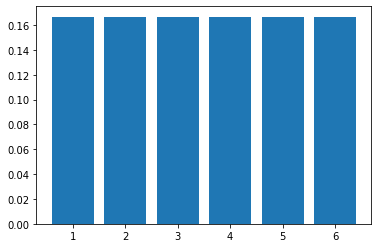

In [3]:
# 確率質量関数(Probability Mass Function)を作って描画する

# サイコロの取り得る値
roll_options = [1, 2, 3, 4, 5, 6]

# 確率の総和は1である
tprob = 1

# 公式なサイコロだったら、どの目も同じ確率で出る
prob_roll = tprob / len(roll_options)

# 描画する
uni_plot = plt.bar(roll_options, [prob_roll] * 6)

平均と分散

離散一様分布における平均は最大値(b)と最小値(a)を足して2で割ったもの
    μ = (b + a) / 2

分散は次の式で計算できる
    σ² = {(b - a + 1)² - 1 } / 12

Scipyを使うとこの分布を簡単に作ることができる

In [4]:
from scipy.stats import randint

# 最大の手前までなので7
low, high = 1, 7

# このコードで離散一様分布の平均と分散を計算することができる
mean, var = randint.stats(low, high)
print('平均={} 分散={}'.format(mean, var))

平均=3.5 分散=2.9166666666666665


<BarContainer object of 6 artists>

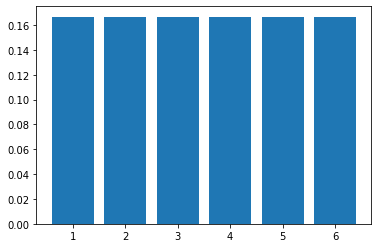

In [5]:
#　確率質量関数(Probably Mass Function)では
plt.bar(roll_options, randint.pmf(roll_options, low, high))

# 応用例
## German Tank Problem
離散一様分布の応用例として、第二次世界大戦においてイギ率がドイツ軍の戦車の生産台数を推定したGerman Tank Problemが有名

Wikipedia(英語) http://en.wikipedia.org/wiki/German_tank_problem

詳しい解説はWiki
簡単例を実際に計算する

Population max = sample max + {(sample max) / (sample size)} - 1

5台(sample size)の戦車をとらえ、それぞれのシリアル番号が3, 7, 11, 16だとするとsample max = 16となる
最小分散不偏推定量を求める

In [6]:
tank_estimate = 16 + (16/ 5) - 1
tank_estimate

18.2

ベイズ統計的なアプローチでは次のような値になる

In [7]:
m = 16
k = 5
tank_b_estimate = (m-1)*( (k-1) / (k-2))
tank_b_estimate

20.0

________________________________________________________________________________________________________
# 連続一様分布
離散一様分布では、取り得る値と確率をわかりやすく対応づけることができた。
しかし、連続一様分布ではそうはいかない。
無限の精度を求めると、いくらでも数字を細かくできる。
これは2つの数字を考えた時、その間から必ず別の数字を選べるという意味である。
例えば5.41と5.42を考えると、5.415を選べる

そう考えると、連続一様分布では取り得る値の個数nが無限大となる。
そうなると確率は1/∞となってしまうので0となる。
これでは話が始まらないので、連続分布で確率を考えるときは1点ではなく、領域で考える
わかりやすくするために例を交えながら見ていく

-  連続な確率変数Xが次のような確率密度関数(Probability Density Function)に従うとき、これを連続一様分布と呼ぶ

```
    f(x) = 1 / (b - a)
    a <= x <= b
```

離散一様分布ではf(x)=1/nだったが、連続一様分布では最小値aと最大値bの間で定義される領域を考える

分布の平均は単純である

(a + b) / 2

分散は次のように定義される

σ² = (b - a)² / 12


ニューヨーク市での平均的なタクシーの乗車時間は22分くらいであると知られている。
調査の結果、この乗車時間が19分から27分の間の連続的な一様分布に従うことがわかったとする。
タクシーの乗車時間の確率密度関数を求めよ

In [8]:
# 乗車時間の下限
a = 19

# 上限
b = 27

#　連続一様分布の確率密度関数
fx = 1.0 / (b - a)

print('確率密度関数は, {}'.format(fx))

確率密度関数は, 0.125


In [9]:
# 分散
var = ((b - a)**2) / 12

print('分散={}'.format(var))

分散=5.333333333333333


乗車時間が少なくとも25分続く確率を求めよ

In [10]:
# 全体から乗車時間が25ふんより短い場合を引けばいい

# 乗車時間が27分までに収まる確率は全体なので1
# 一方、乗車時間が25分までに収まる確率は
f25 = (25 - 19) / (b - a)

ans = 1 - f25

print('乗車時間が少なくとも25分かかる確率は{}%'.format(100*ans))

乗車時間が少なくとも25分かかる確率は25.0%


scipyを使って便利に連続一様分布を作る

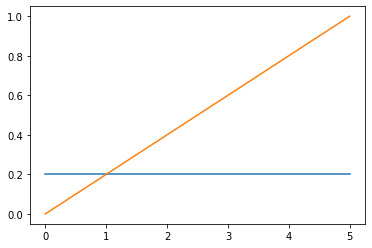

In [11]:
from scipy.stats import uniform

# 最小と最大を作る
A = 0
B = 5

# AからBまで100Point作っておく
x = np.linspace(A, B, 100)

# 連続一様分布はuniform(loc=start point, scale=endpoint)で作れる
rv = uniform(loc=A, scale=B)

# 確率密度関数(PDF)と累積分布関数(Cumulative Distribution Function)を描いてみる
plt.plot(x, rv.pdf(x))
plt.plot(x, rv.cdf(x))

青い線(確率密度関数)は0.2のところにあるが、1/(5-0)が1/5=0.2なのですぐに確かめられる

オレンジは累積分布関数

________________________________________________________________________________________________________
# 二項分布(Binomial Distribution)　←　離散分布の一種

まずは例題
プレイヤーAとプレイヤーBの2人がバスケットボールを行う。
Aは1ゲームで平均11回シュートして、平均的な成功率は72%
Bは1ゲームで平均15回シュートして、平均的な成功率は48%

問１:プレイヤーAが平均的な1試合で6回シュートを決める確率は？

問2:プレイヤーBが平均的な1試合で6回シュートを決める確率は？

以下の条件が満たされれば、この問題を二項分布を使って考えることができる
    1)全体がn回の連続した試行からなる
    2)それぞれの試行は、相互に排他的な2つの事象からなる(例えば成功と失敗)
    3)成功の確率がpならば、失敗の確率は1-p
    4)それぞれの試行は独立
二項分布の確率質量関数は以下のようになる。

Pr(X = k) = C(n, k)(p**k) * (1-p)**(n-k)

nは試行の回数、kは成功の数、pは成功の確率, 1-pは失敗の確率だが、しばしばqと書かれる

n回試行して,k回成功する確率は

p ** k

またn-k回失敗する確率は
(1-p)**(n-k)

n回の試行でk回の成功がどこに来るかわからないが、この並べ方は
C(n,k)
通りある。これらを全て掛け合わせればn回間k回成功する確率が求まる

C(n, k)は組み合わせ

実際には下記の式で表現できる
C(n, k)=n! / k!(n-k)!


## 例題

In [19]:
# Aの成功率
p_A = 0.72
# シュートの数
n_A = 11

# 成功数
k = 6

# 組み合わせを求めるため
import scipy.special as sc

comb_A = sc.comb(n_A, k)

#　これらを掛け合わせれば確率が出る
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# パーセントで結果を格納
answer_A = 100*answer_A

#　Bも同様
p_B = 0.48
n_B = 15
comb_B = sc.comb(n_B, k)
answer_B = comb_B * (p_B ** k) * ((1-p_B)**(n_B-k))
answer_B = 100*answer_B

print('プレイヤーAが平均的な試合で6回シュートを決める確率は{:0.2f} %'.format(answer_A))
print('プレイヤーBが平均的な試合で6回シュートを決める確率は{:0.2f} %'.format(answer_B))

プレイヤーAが平均的な試合で6回シュートを決める確率は11.08 %
プレイヤーBが平均的な試合で6回シュートを決める確率は17.02 %


下手なシュートも数打てば当たるように見える

では次に、9回決める確率を計算する

In [21]:
# 9回決めなければならない
# 成功数
k = 9

# 組み合わせを求めるため
import scipy.special as sc

comb_A = sc.comb(n_A, k)

#　これらを掛け合わせれば確率が出る
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# パーセントで結果を格納
answer_A = 100*answer_A

#　Bも同様
p_B = 0.48
n_B = 15
comb_B = sc.comb(n_B, k)
answer_B = comb_B * (p_B ** k) * ((1-p_B)**(n_B-k))
answer_B = 100*answer_B

print('プレイヤーAが平均的な試合で9回シュートを決める確率は{:0.2f} %'.format(answer_A))
print('プレイヤーBが平均的な試合で9回シュートを決める確率は{:0.2f} %'.format(answer_B))

プレイヤーAが平均的な試合で9回シュートを決める確率は22.42 %
プレイヤーBが平均的な試合で9回シュートを決める確率は13.38 %


9回決める確率はAの方が上回っている

ここで注意しなければならない点として、今考えているのは9回決める確率であって、少なくとも9回決める確率ではないということ

## 平均と分散
二項分布の平均は単純
μ= n * p

これは直感的にもわかりやすい

庭訓的な成功率と試行の回数をかければ平均的な成功の回数となる

標準偏差(分散の平方根)は次の式で求められる

σ　= √n　*　q　*　p


シュートの決まる回数の平均と、+/-標準偏差を計算できる

In [22]:
#　平均値
mu_A = n_A * p_A
mu_B = n_B * p_B

# 標準偏差
sigma_A = (n_A * p_A*(1-p_A))**0.5
sigma_B = (n_B * p_B*(1-p_B))**0.5

print("プレイヤーAは1試合で、平均{:0.1f}回±{:0.1f}シュートを決める".format(mu_A, sigma_A), end="\n\n")
print("プレイヤーBは1試合で、平均{:0.1f}回±{:0.1f}シュートを決める".format(mu_B, sigma_B))

プレイヤーAは1試合で、平均7.9回±1.5シュートを決める

プレイヤーBは1試合で、平均7.2回±1.9シュートを決める


#### scipyを利用できる

In [23]:
from scipy.stats import binom

mean, var = binom.stats(n_A, p_A)

print(mean)
print(var ** 0.5)

7.92
1.4891608375189027


#### 確率質量関数も求められる

コインを10回投げて裏と表を出すことを考えてみる

In [26]:
import numpy as np
# 10回と、表の確率0.5をセット
n = 10
p = 0.5

x = range(n + 1)

# 二項分布の確率質量関数から、実際の確率を計算できる
Y = binom.pmf(x, n, p)

Y

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

Text(0, 0.5, 'Probability')

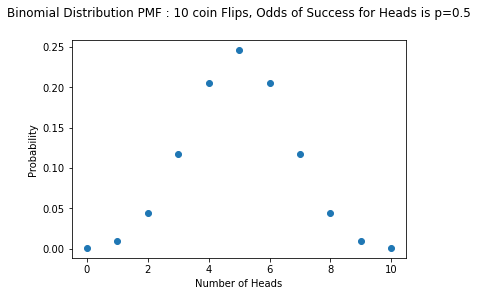

In [27]:
# プロットする
plt.plot(x, Y, 'o')

# y=1.08はタイトルが少し上に行くようにするため
plt.title('Binomial Distribution PMF : 10 coin Flips, Odds of Success for Heads is p=0.5', y=1.08)

# 軸にタイトルをつけられる
plt.xlabel('Number of Heads')
plt.ylabel('Probability')